In [ ]:
import os
from pathlib import Path
import gc

import random
import numpy as np
import pandas as pd

import math

from collections import defaultdict

import warnings
warnings.simplefilter("ignore")

In [ ]:
#Fillna for the values that hasn't label. Fill with empty string
biz_label = pd.read_csv("train.csv").fillna('')
biz_label.head()

,business_id,labels
0,1000,1 2 3 4 5 6 7
1,1001,0 1 6 8
2,100,1 2 4 5 6 7
3,1006,1 2 4 5 6
4,1010,0 6 8


In [ ]:
photo_biz = pd.read_csv("train_photo_to_biz_ids.csv")
photo_biz.head()

,photo_id,business_id
0,204149,3034
1,52779,2805
2,278973,485
3,195284,485
4,19992,485


In [ ]:
bizs, labels = biz_label['business_id'], biz_label['labels']
biz2label = {biz:label for biz, label in zip (bizs, labels)}

In [ ]:
bizzes = list(biz2label.keys())
len(bizzes)

2000

In [ ]:
photo2biz = {photo:biz for photo,biz in zip (photo_biz['photo_id'], photo_biz['business_id'])}

Queremos poder extraer, para cada restaurante, su lista de imágenes

In [ ]:
#Defaultdic porque hay registros que no tienen id de imagenes
biz2photos = defaultdict(lambda: [])
for img, biz in photo2biz.items():
  biz2photos[biz].append(img)

In [ ]:
biz2photos[3][:4]

[231210, 54476, 276530, 414322]

Vamos a crear una nueva pandas dataframe donde tengamos el nombre de la foto y las labels que le corresponden al restaurante respectivo. Usando  apply

In [ ]:
photo_label= photo_biz.copy()
photo_label['labels'] = photo_label.business_id.apply(lambda x: biz2label[x])
photo_label.head()

,photo_id,business_id,labels
0,204149,3034,3 8
1,52779,2805,1 2 3 5 6 7
2,278973,485,1 2 3 4 5 6 7
3,195284,485,1 2 3 4 5 6 7
4,19992,485,1 2 3 4 5 6 7


In [ ]:
len(photo_label['business_id'].unique())

2000

In [ ]:
photo_label.drop('business_id',1, inplace=True)
photo_label.head()

,photo_id,labels
0,204149,3 8
1,52779,1 2 3 5 6 7
2,278973,1 2 3 4 5 6 7
3,195284,1 2 3 4 5 6 7
4,19992,1 2 3 4 5 6 7


# Tarea
## Para cada posible label, ¿qué porcentaje de los restaurantes tienen labels?

In [ ]:
for i in range (9):
  photo_label[i] = 0

In [ ]:
for index, row in photo_label.iterrows():
  labels_aux = row['labels'].split()
  for col_label in labels_aux:
    photo_label.loc[index,int(col_label)] = 1

In [ ]:
photo_label.to_csv('photo_label__encoder.csv')

In [3]:
import pandas as pd

In [25]:
photo_label_enocoded = pd.read_csv('photo_label__encoder.csv')

In [26]:
photo_label_enocoded.drop('Unnamed: 0', 1, inplace=True)

In [27]:
photo_label_enocoded

,photo_id,business_id,labels,0,1,2,3,4,5,6,7,8
0,204149,3034,3 8,0,0,0,1,0,0,0,0,1
1,52779,2805,1 2 3 5 6 7,0,1,1,1,0,1,1,1,0
2,278973,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0
3,195284,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0
4,19992,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
234837,325414,496,1 4 5 6 7,0,1,0,0,1,1,1,1,0
234838,301030,3565,1 2 5 6,0,1,1,0,0,1,1,0,0
234839,355839,1875,1 2 5 6 7 8,0,1,1,0,0,1,1,1,1
234840,20474,3888,0 1 2 3 5 6 7 8,1,1,1,1,0,1,1,1,1


In [28]:
photo_label_grouped = photo_label_enocoded.groupby('business_id').sum()

¿Qué porcentage de los restaurantes tienen label?


In [29]:
porcentages = []
N = len(photo_label_grouped)
for i in range(9):
  porcentages.append(len(photo_label_grouped[photo_label_grouped[str(i)]!=0])*100/N)

In [30]:
import matplotlib.pyplot as plt
import numpy as np

Label: 0 -- Porcentage: 33.55%
Label: 1 -- Porcentage: 49.65%
Label: 2 -- Porcentage: 51.3%
Label: 3 -- Porcentage: 50.15%
Label: 4 -- Porcentage: 27.35%
Label: 5 -- Porcentage: 62.45%
Label: 6 -- Porcentage: 68.0%
Label: 7 -- Porcentage: 28.6%
Label: 8 -- Porcentage: 61.9%


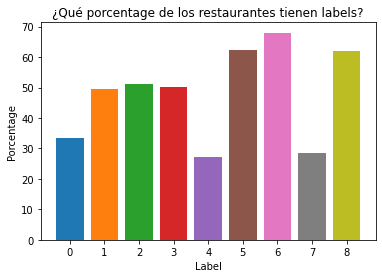

In [31]:
x = np.arange(len(porcentages))
for i in range (len(porcentages)):
  plt.bar(i, porcentages[i], label=porcentages[i])
plt.xticks(x, x)
plt.ylabel('Porcentage')
plt.xlabel('Label')
plt.title('¿Qué porcentage de los restaurantes tienen labels?')
#plt.legend()
for i in range(len(porcentages)):
  print(f'Label: {i} -- Porcentage: {porcentages[i]}%')

# Baseline

In [42]:
labels_baseline = ['2','3','5','6','8']

In [39]:
photo_label_enocoded['labels_baseline']= [labels_baseline]*len(photo_label_enocoded)

In [54]:
photo_label_enocoded['f1'] =0
photo_label_enocoded

,photo_id,business_id,labels,0,1,2,3,4,5,6,7,8,labels_baseline,f1
0,204149,3034,3 8,0,0,0,1,0,0,0,0,1,"[2, 3, 5, 6, 8]",0
1,52779,2805,1 2 3 5 6 7,0,1,1,1,0,1,1,1,0,"[2, 3, 5, 6, 8]",0
2,278973,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0,"[2, 3, 5, 6, 8]",0
3,195284,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0,"[2, 3, 5, 6, 8]",0
4,19992,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0,"[2, 3, 5, 6, 8]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234837,325414,496,1 4 5 6 7,0,1,0,0,1,1,1,1,0,"[2, 3, 5, 6, 8]",0
234838,301030,3565,1 2 5 6,0,1,1,0,0,1,1,0,0,"[2, 3, 5, 6, 8]",0
234839,355839,1875,1 2 5 6 7 8,0,1,1,0,0,1,1,1,1,"[2, 3, 5, 6, 8]",0
234840,20474,3888,0 1 2 3 5 6 7 8,1,1,1,1,0,1,1,1,1,"[2, 3, 5, 6, 8]",0


In [44]:
from sklearn.metrics import f1_score

In [71]:
photo_label_enocoded['labels'].dropna(inplace=True)

In [75]:
for index, row in photo_label_enocoded.dropna().iterrows():
  labels_aux = row['labels'].split()
  y_pred = []
  for label in labels_aux:
    if label in labels_baseline:
      y_pred.append(str(label))
    else:
      y_pred.append(str(0))
    y_true = labels_aux
  #print(labels_aux, labels_baseline)
  #print(y_true, y_pred)
  #print(f1_score(y_true, y_pred, average='macro'))
  photo_label_enocoded.loc[index, 'f1']= f1_score(y_true, y_pred, average='macro')

  #if index ==3:beak

In [76]:
photo_label_enocoded.to_csv('f1.csv')

In [78]:
photo_label_enocoded['f1'].mean()

0.7054082013332128